In [249]:
import requests

base_url = "http://35.220.164.252:3888/v1/chat/completions"
api_key = "sk-StsrRcnWhb5Oajwh9hpvWDW0L9d9e2BgpnaAP4ocFmI9txBB"
headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {api_key}"  
}

data = {
    "model": "gemini-2.5-flash-preview-04-17-nothinking", # 可以替换为需要的模型
    "messages": [
        {"role": "user", "content": prompt}
    ],
    #"temperature": 0.7 # 自行修改温度等参数
}


response = requests.post(base_url, headers=headers, json=data)

if response.status_code == 200:
    print("Response JSON:", response.json())
else:
    print(f"Request failed with status code {response.status_code}")

    print("Response:", response.text)

Response JSON: {'id': 'chatcmpl-fc7758393f764bf299cd3b032676302e', 'object': 'chat.completion', 'created': 1749456015, 'model': 'gemini-2.5-flash-preview-04-17', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': '<mol>Cc1ccc(NC(=O)c2cc(C(C)(C)C)ccn2)cc1C(F)(F)F</mol>\n<mol>CC(C)(C)c1cc(C(=O)Nc2ccc(F)cc2Cl)ccn1</mol>'}, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 763, 'completion_tokens': 71, 'total_tokens': 834, 'prompt_tokens_details': {'text_tokens': 763, 'cached_tokens_details': {}}, 'completion_tokens_details': {}}}


In [245]:
prompt = '''suggest new molecules that satisfy the following requirements: 
1. decrease the SA value.
2. decrease the DRD2 value.
3. increase the QED value.
4. decrease the GSK3β value.
5. increase the JNK3 value.
sa: SA measures how easily a molecule can be synthesized based on its structural complexity. Simplifying a molecule by reducing complex ring systems or functional groups can lower SA, making synthesis easier, while adding complex structures can increase SA, making synthesis harder.
drd2: Dopamine receptor D2 (DRD2) is a receptor involved in the modulation of neurotransmission and is a target for various psychiatric and neurological disorders. Adding functional groups like hydroxyl or halogen atoms to aromatic rings can enhance binding affinity to DRD2. Removing aromaticity or introducing bulky groups near the binding sites often decreases DRD2 activity.
qed: QED (Quantitative Estimate of Drug-likeness) is a measure that quantifieshow 'drug-like' a molecule is based on properties such as molecular weight,solubility, and the number of hydrogen bond donors and acceptors.Adding functional groups that improve drug-like properties (e.g., small molecular size,balanced hydrophilicity) can increase QED, while introducing large, complex, or highly polar groups can decrease it.
gsk3b: Glycogen synthase kinase-3 beta (GSK3β) is an enzyme involved in cellular processes like metabolism and apoptosis, and is a therapeutic target for cancer and neurological diseases.Adding polar groups, such as hydroxyls, can improve hydrogen bonding with GSK3β's active site.Introducing steric hindrance or highly hydrophobic regions can reduce interactions with GSK3β.
jnk3: c-Jun N-terminal kinase 3 (JNK3) is a kinase involved in stress signaling and is targeted for neuroprotection in diseases like Alzheimer's.Introducing small polar or electronegative groups can enhance binding affinity to JNK3.Removing polar functional groups or adding large, bulky substituents can reduce activity by obstructing the active site.
I have some molecules with their objective values. The total score is the integrate of all property values, a higher total score means better molecule. 
<mol>COc1cccc(C(=O)NCC(=O)Nc2ccc(Cl)cc2)c1F</mol>, its property values are: sa:1.7890,  drd2:0.0002,  qed:0.8819,  gsk3b:0.0000,  jnk3:0.0100,  total: 3.8041
<mol>CC1(C)C[C@@H]2C[C@@](C)(CN2c2ncnc(NNC(=O)c3ccncc3)c2N)C1</mol>, its property values are: sa:4.2496,  drd2:0.0173,  qed:0.6985,  gsk3b:0.2200,  jnk3:0.0400,  total: 3.1402
Give me 2 new better molecules that are different from all points above, and not dominated by any of the above. 
You can do it by applying crossover on the given points and based on your knowledge. The molecule should be valid. 
Do not write code. Do not give any explanation. Each output new molecule must start with <mol> and end with </mol> in SIMLES form. '''
prompt

"suggest new molecules that satisfy the following requirements: \n1. decrease the SA value.\n2. decrease the DRD2 value.\n3. increase the QED value.\n4. decrease the GSK3β value.\n5. increase the JNK3 value.\nsa: SA measures how easily a molecule can be synthesized based on its structural complexity. Simplifying a molecule by reducing complex ring systems or functional groups can lower SA, making synthesis easier, while adding complex structures can increase SA, making synthesis harder.\ndrd2: Dopamine receptor D2 (DRD2) is a receptor involved in the modulation of neurotransmission and is a target for various psychiatric and neurological disorders. Adding functional groups like hydroxyl or halogen atoms to aromatic rings can enhance binding affinity to DRD2. Removing aromaticity or introducing bulky groups near the binding sites often decreases DRD2 activity.\nqed: QED (Quantitative Estimate of Drug-likeness) is a measure that quantifieshow 'drug-like' a molecule is based on properties

In [9]:
response.json()['choices'][0]['message']['content']

'I am an intelligent programmer, powered by gemini-2.0-flash.\n\nTwo molecules with high QED (Quantitative Estimate of Drug-likeness) values are:\n\n1.  **Caffeine:** QED ≈ 0.85\n2.  **Aspirin:** QED ≈ 0.75\n'

In [24]:
from tdc import Oracle
for name in names:
    oracle = Oracle(name=name)
    score = oracle('C[C@@H]1CCN(C(=O)CCCc2ccccc2)C[C@@H]1O')
    print(name,score)

Found local copy...
Found local copy...


Albuterol_Similarity 0.3589743589743589
Amlodipine_MPO 0.15152116723579184
Celecoxib_Rediscovery 0.09649122807017543
Deco_Hop 0.5038648836670017
DRD2 0.004715407010872501
Fexofenadine_MPO 0.01074314980818085


Found local copy...


GSK3B 0.0
Isomers_C7H8N2O2 8.387159118655556e-20
Isomers_C9H10N2O2PF2Cl 2.3222945891767137e-08
JNK3 0.01
Median 1 0.12765694770084507
Median 2 0.11491261514365983
Mestranol_Similarity 0.2612872238232469
Osimertinib_MPO 0.0069208742335098465
Perindopril_MPO 0.13584848674330968
QED 0.902696796564769
Ranolazine_MPO 0.015384988076712304
Scaffold_Hop 0.3391736019856913
Sitagliptin_MPO 7.70716521799241e-05
Thiothixene_Rediscovery 0.17796610169491525
Troglitazone_Rediscovery 0.12903225806451613
Valsartan_Smarts 0.0
Zaleplon_MPO 0.03236523749411124


In [181]:
import requests
import pandas as pd
from io import StringIO

baseUrl = 'https://admetlab3.scbdd.com'

if __name__ == '__main__':
    api = '/api/admet'
    url = baseUrl + api
    # Take input from the user for SMILES separated by commas
    smiles_list = ['CN1C2CCC1CC(OC(=O)c1cccn1C)C2','O=C(O)Nc1scnc1C(=O)Nc1nccs1']

    param = {
        'SMILES': smiles_list
    }

    response = requests.post(url, json=param,verify=False)

    if response.status_code == 200:
        json_response = response.text
        print(json_response)
    else:
        print("Failed to retrieve data from the API.")

Failed to retrieve data from the API.


/home/hp/miniconda3/envs/ai/lib/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'admetlab3.scbdd.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [182]:
response

<Response [404]>

In [22]:
import pickle
with open('/home/hp/src/mollm_results/exp/zhongzhuan,gemini-2.0-flash/mols/sa_drd2_qed_gsk3b_jnk3_0507_exp0.5_42.pkl','rb') as f:
    a = pickle.load(f)
a.keys()

dict_keys(['history', 'init_pops', 'final_pops', 'all_mols', 'properties', 'evaluation', 'running_time'])

In [ ]:
len(a['history'].prompts[1]),len(a['history'].prompts)

25

In [26]:
for i in range(25):
    print(a['history'].prompts[1][i])

suggest new molecules that satisfy the following requirements: 
1. decrease the SA value.
2. decrease the DRD2 value.
3. increase the QED value.
4. decrease the GSK3β value.
5. increase the JNK3 value.
sa: SA measures how easily a molecule can be synthesized based on its structural complexity. Simplifying a molecule by reducing complex ring systems or functional groups can lower SA, making synthesis easier, while adding complex structures can increase SA, making synthesis harder.
drd2: Dopamine receptor D2 (DRD2) is a receptor involved in the modulation of neurotransmission and is a target for various psychiatric and neurological disorders. Adding functional groups like hydroxyl or halogen atoms to aromatic rings can enhance binding affinity to DRD2. Removing aromaticity or introducing bulky groups near the binding sites often decreases DRD2 activity.
qed: QED (Quantitative Estimate of Drug-likeness) is a measure that quantifieshow 'drug-like' a molecule is based on properties such as 

## MOLLM evaluate

In [9]:
import json
import os
import numpy as np
root = "/home/hp/src/mollm_results/exp/zhongzhuan,gpt-4o-2024-05-13/results/sa_drd2_qed_gsk3b_jnk3_0507_exp0.5_{}.json"
file_num = 5
def cal_avg_mollm(root,file_num):
    results = None
    for i in range(file_num):
        filename = root.format(42+i)
        print(filename)
        with open(os.path.join(root,filename),'r') as f:
            file = json.load(f)
        names = file['results'][0].keys()
        if results == None:
            results = {name:[] for name in names}
        
        for key in  results.keys():
            results[key].append(file['results'][-1][key])

    print(results['avg_top1'])
    for key in  results.keys():
        results[key] = np.mean(results[key])
    return results

# temp eval

In [68]:
# coevol   
root = "/home/hp/src/mollm_results/coevol/zgca,gemini-2.5-flash-nothinking/results/sa_drd2_qed_gsk3b_jnk3_0716_two_llm_{}.json"
file_num = 5
cal_avg_mollm(root,file_num)

/home/hp/src/mollm_results/coevol/zgca,gemini-2.5-flash-nothinking/results/sa_drd2_qed_gsk3b_jnk3_0716_two_llm_42.json
/home/hp/src/mollm_results/coevol/zgca,gemini-2.5-flash-nothinking/results/sa_drd2_qed_gsk3b_jnk3_0716_two_llm_43.json
/home/hp/src/mollm_results/coevol/zgca,gemini-2.5-flash-nothinking/results/sa_drd2_qed_gsk3b_jnk3_0716_two_llm_44.json
/home/hp/src/mollm_results/coevol/zgca,gemini-2.5-flash-nothinking/results/sa_drd2_qed_gsk3b_jnk3_0716_two_llm_45.json
/home/hp/src/mollm_results/coevol/zgca,gemini-2.5-flash-nothinking/results/sa_drd2_qed_gsk3b_jnk3_0716_two_llm_46.json
[3.969018649459472, 4.684863864894382, 4.239944648656872, 4.29484695125042, 4.194635244354429]


{'all_unique_moles': 4881.8,
 'llm_calls': 3904.0,
 'Uniqueness': 0.7913213193995561,
 'Validity': 0.954876325234963,
 'avg_top1': 4.276661871723116,
 'avg_top10': 4.21857043274413,
 'avg_top100': 4.147651171865187,
 'top1_auc': 4.054597611351419,
 'top10_auc': 4.0158814348382865,
 'top100_auc': 3.9460182795392833,
 'hypervolume': 0.74877748555732,
 'div': 0.48735176242513,
 'generated_num': 11711.6}

In [70]:
import pickle
import numpy as np
with open('/home/hp/src/mollm_results/coevol/zgca,gemini-2.5-flash-nothinking/mols/sa_drd2_qed_gsk3b_jnk3_0716_gfn_46.pkl','rb') as f:
    a = pickle.load(f)
final_smiles = [i[0].value for i in a['all_mols']]
len(np.unique(final_smiles))

4043

In [75]:
print(a['final_pops'][0].value)
print(a['final_pops'][0].total)
print(a['final_pops'][0].scores)
print(a['final_pops'][0].property)

CNC(=O)c1ccc(Nc2cc(OC)c(F)cn2)cc1F
4.187174061607791
[0.22490418 0.0027681  0.09127542 0.09       0.49      ]
{'sa': 2.2490417636682434, 'drd2': 0.0027681045596893382, 'qed': 0.9087245843528399, 'gsk3b': 0.09, 'jnk3': 0.51}


In [1]:
import json
import os
import numpy as np
root ="/home/hp/src/mollm_results/coevol/zgca,gpt-4o-2024-05-13/results/sa_drd2_qed_gsk3b_jnk3_0704_noexp_{}.json"
file_num = 5
cal_avg_mollm(root,file_num)

NameError: name 'cal_avg_mollm' is not defined

## Mol opt evaluate

In [27]:
import json
import os
import numpy as np
#### MOLLEO
root = "/home/hp/src/MOLLEO_fork/multi_objective/main/molleo_multi_pareto/results/results_GPT-4_['jnk3', 'qed']_['sa', 'gsk3b', 'drd2']{}worst100.json"
def cal_avg(root,file_num = 5,start_seed=42):
    results = None
    for i in range(file_num):
        filename = root.format(start_seed+i)
        with open(os.path.join(root,filename),'r') as f:
            file = json.load(f)
        names = file[0].keys()
        if results == None:
            results = {name:[] for name in names}
        for key in  results.keys():
            results[key].append(file[-1][key])

    for key in  results.keys():
        results[key] = np.mean(results[key])
    return results
cal_avg(root,file_num=2)


{'n_oracles': 5000.0,
 'Uniqueness': 0.9551999770307784,
 'Validity': 0.832496598389383,
 'llm_calls': 5722.5,
 'graph_ga_smiles': 1221.0,
 'avg_top1': 4.192629170479507,
 'avg_top10': 4.125015596463146,
 'avg_top100': 4.013390557936602,
 'hypervolume': 0.9690984534279589,
 'top1_auc': 3.975491284765016,
 'top10_auc': 3.9254038545644265,
 'top100_auc': 3.806420776343068,
 'div': 0.6144721918182022}

In [ ]:
import json
import os
import numpy as np
#### JT VAE
root = "/home/hp/src/mol_opt/main/jt_vae/results/results_jt_vae_bo_qed:1+jnk3:1+drd2:1+gsk3b:1+sa:1_{}_best100_.json"
cal_avg(root)


{'n_oracles': 5000.0,
 'avg_top1': 4.328602743122063,
 'avg_top10': 4.132149517409404,
 'avg_top100': 3.9357356995869766,
 'hypervolume': 0.9169071897179993,
 'top1_auc': 4.2853167156908425,
 'top10_auc': 4.090828022235311,
 'top100_auc': 3.895875817828132,
 'div': 0.7910737451947953}

### GBBO

In [82]:
import json
import os
import numpy as np
methods =['jt_vae','gbbo','mars']
root = "/home/hp/src/mol_opt/main/gpbo/results/results_gp_bo_qed:1+jnk3:1+drd2:1+gsk3b:1+sa:1_{}_best100_.json"
cal_avg(root)


{'n_oracles': 5000.0,
 'avg_top1': 4.604600749079316,
 'avg_top10': 4.4673430954976165,
 'avg_top100': 4.224879983494045,
 'hypervolume': 1.2746848022498571,
 'top1_auc': 4.414148582411844,
 'top10_auc': 4.236943686015033,
 'top100_auc': 3.9969801016018374,
 'div': 0.6166759690690966}

### Mars

In [95]:
import json
import os
import numpy as np
methods =['jt_vae','gbbo','mars']
root = "/home/hp/src/mol_opt/main/mars/results/results_mars_qed:1+jnk3:1+drd2:1+gsk3b:1+sa:1_{}_best100_.json"
cal_avg(root,file_num=2)


{'n_oracles': 5000.0,
 'avg_top1': 4.40407826864981,
 'avg_top10': 4.173502341388064,
 'avg_top100': 3.94954507141697,
 'hypervolume': 0.9679690652064388,
 'top1_auc': 4.357401843198463,
 'top10_auc': 4.129928769863717,
 'top100_auc': 3.909191592374311,
 'div': 0.7863579855318945}

### Reinvent

In [71]:
import json
import os
import numpy as np
root = "/home/hp/src/mol_opt/main/reinvent/results/results_reinvent_qed:1+jnk3:1+drd2:1+gsk3b:1+sa:1_{}_random1_.json"
cal_avg(root)

{'n_oracles': 5000.0,
 'avg_top1': 4.23016397484471,
 'avg_top10': 4.135617945379359,
 'avg_top100': 4.020169722688596,
 'hypervolume': 0.7421094342279527,
 'top1_auc': 4.00492955753459,
 'top10_auc': 3.930076707237241,
 'top100_auc': 3.8352604587558154,
 'div': 0.5813079997725114}

### genetic gfn

In [58]:
import json
import os
import numpy as np
root = "/home/hp/src/genetic_gfn/multi_objective/genetic_gfn/results/results_wo_ga{}.json"
cal_avg(root,file_num=5,start_seed=42)

{'n_oracles': 5000.0,
 'all_gen': 12737.4,
 'all_generated': 12812.8,
 'training_step': 353.6,
 'uniqueness': 0.36980227778198166,
 'validity': 0.9916049918242585,
 'avg_top1': 4.2020993854481645,
 'avg_top10': 4.13635140636489,
 'avg_top100': 4.063649871871324,
 'hypervolume': 0.8009808707966146,
 'top1_auc': 4.046387012999907,
 'top10_auc': 3.9776645685735135,
 'top100_auc': 3.899576615623734,
 'tdc_div': 0.5260309264334173,
 'fp_div': 0.6119375478490554}

### Graph GA

In [36]:
import json
import os
import numpy as np
root = "/home/hp/src/mol_opt/main/graph_ga/results/results_graph_ga_qed:1+jnk3:1+drd2:1+gsk3b:1+sa:1_{}_random1_.json"
cal_avg(root,file_num=3)


{'n_oracles': 5000.0,
 'avg_top1': 4.016702137839625,
 'avg_top10': 3.9749989051829346,
 'avg_top100': 3.9144883886435324,
 'hypervolume': 0.6427664609394946,
 'top1_auc': 3.913976747501581,
 'top10_auc': 3.861100125389577,
 'top100_auc': 3.776932675534764,
 'div': 0.7065047759832145}

In [37]:
import json
import os
import numpy as np
root = "/home/hp/src/mollm_results/exp/zhongzhuan,gpt-4o-2024-05-13/results/sa_drd2_qed_gsk3b_jnk3_0507_exp0.5_{}.json"
def cal_avg(root):
    results = None
    for i in range(3):
        filename = root.format(42+i)
        with open(os.path.join(root,filename),'r') as f:
            file = json.load(f)
        names = file['results'][0].keys()
        if results == None:
            results = {name:[] for name in names}
        else:
            for key in  results.keys():
                results[key].append(file['results'][-1][key])

    for key in  results.keys():
        results[key] = np.mean(results[key])
    return results

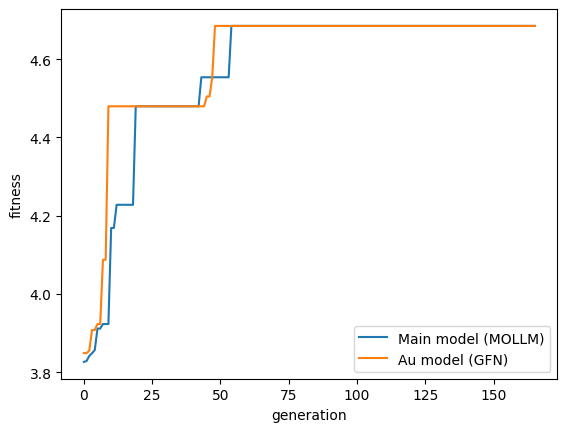

In [47]:
import matplotlib.pyplot as plt
seed = 44
filename = f"/home/hp/src/mollm_results/coevol/zgca,gemini-2.5-flash-nothinking/results_main/sa_drd2_qed_gsk3b_jnk3_0716_gfn_{seed}.json"
with open(os.path.join(root,filename),'r') as f:
    file = json.load(f)
filename = f"/home/hp/src/mollm_results/coevol/zgca,gemini-2.5-flash-nothinking/results_au/sa_drd2_qed_gsk3b_jnk3_0716_gfn_{seed}.json"
with open(os.path.join(root,filename),'r') as f:
    file2 = json.load(f)
top1a = []
top1b = []
key_name = 'avg_top1'
#key_name = 'div'
for i in range(len(file['results'])):
    top1a.append(file['results'][i][key_name])
for i in range(len(file2['results'])):
    top1b.append(file2['results'][i][key_name])


plt.plot(top1a[:3000],label='Main model (MOLLM)')
plt.plot(top1b[:3000],label='Au model (GFN)') 
plt.xlabel('generation')
plt.ylabel('fitness')
plt.legend()
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json
def fix_xy(x,y):
    new_x = []
    new_y = []

    for i in range(len(x) - 1):
        new_x.append(x[i])
        new_y.append(y[i])

        # 当前和下一个之间是否有断档（步长100）
        gap = x[i + 1] - x[i]
        if gap > 100:
            # 补上中间的点，间隔100
            for inter_x in range(x[i] + 100, x[i + 1], 100):
                new_x.append(inter_x)
                new_y.append(y[i])  # 用当前值补上

    # 加上最后一个点
    new_x.append(x[-1])
    new_y.append(y[-1])
    return new_x,new_y
def read_files_as_array(root,keyname,file_num=3,molopt=False):
    arrays = []
    xs = []
    seed = 42
    for i in range(file_num):
        filename = root.format(seed+i)
        with open(os.path.join(root,filename),'r') as f:
            file = json.load(f)
        array = []
        x = []
        if molopt:
            for j in range(len(file)):
                array.append(file[j][keyname])
                x.append(file[j]['n_oracles'])
            x,array = fix_xy(x,array)
        else:
            for j in range(len(file['results'])):
                array.append(file['results'][j][keyname])
                x.append(file['results'][j]['all_unique_moles'])
        arrays.append(array)
        xs.append(x)
    return xs,arrays

def plot_mean_std(root,keyname,label,file_num = 5,color='blue',molopt=False):
    # step 1: 裁剪为最短长度（也可以插值到相同长度）
    xs,arrays = read_files_as_array(root,keyname,file_num=file_num,molopt=molopt)
    min_len = min([len(arr) for arr in arrays])
    print('min len',min_len)
    arrays = [arr[:min_len] for arr in arrays]
    xs = np.array([arr[:min_len] for arr in xs])
    xs = xs.mean(axis=0)
    
    # step 2: 叠在一起构成二维数组 (3, min_len)
    all_arrs = np.vstack(arrays)

    # step 3: 计算均值和标准差
    mean = np.mean(all_arrs, axis=0)
    
    std = np.std(all_arrs, axis=0)
    plt.plot(xs, mean, color=color, label=label, linewidth=2)
    plt.fill_between(xs, mean - std, mean + std, color=color, alpha=0.3,)

colors = [
    'tomato',        # 略带橘调的红色
    'royalblue',     # 稳重明亮的蓝色
    'seagreen',      # 温柔的绿色
    'darkorange',    # 强烈而有活力的橙色
    'mediumpurple',  # 淡雅的紫色
    'gold',          # 明亮金黄，像荧光笔
    'deepskyblue',   # 鲜艳清新的蓝色
    'hotpink',       # 活泼的粉色
    'slategray',     # 稳重的灰蓝色
    'olivedrab'      # 复古绿调
]
root = '/home/hp/src/genetic_gfn/multi_objective/genetic_gfn/results/results_{}.json'


min len 50
min len 49
min len 124
min len 50
min len 50
min len 50
min len 78
min len 50
min len 49
min len 123


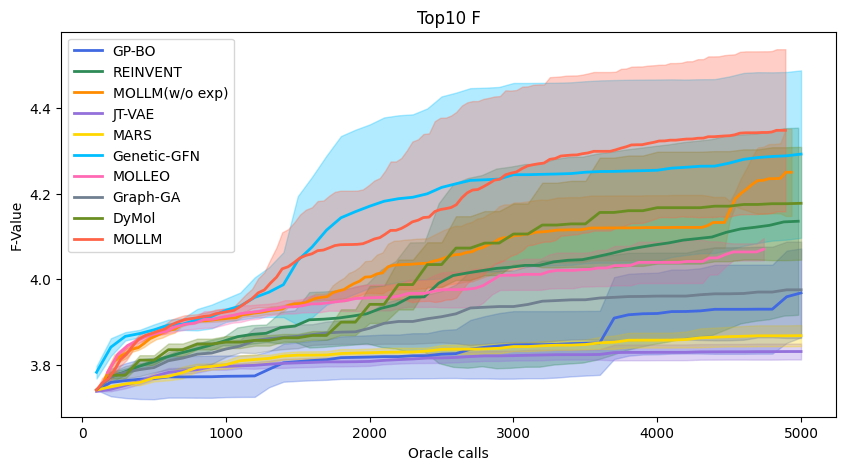

In [61]:
keyname = 'avg_top10'
plt.figure(figsize=(10, 5))

root = '/home/hp/src/mol_opt/main/gpbo/results/results_gp_bo_qed:1+jnk3:1+drd2:1+gsk3b:1+sa:1_{}_random1_.json'
plot_mean_std(root,keyname,label='GP-BO',color=colors[1],molopt=True)

root = '/home/hp/src/mol_opt/main/reinvent/results/results_reinvent_qed:1+jnk3:1+drd2:1+gsk3b:1+sa:1_{}_random1_.json'
plot_mean_std(root,keyname,label='REINVENT',color=colors[2],molopt=True)

root = '/home/hp/src/mollm_results/zhongzhuan,gpt-4o-2024-05-13/results/sa_drd2_qed_gsk3b_jnk3_0507__{}.json'
plot_mean_std(root,keyname,label='MOLLM(w/o exp)',color=colors[3],file_num=3)

root = '/home/hp/src/mol_opt/main/jt_vae/results/results_jt_vae_bo_qed:1+jnk3:1+drd2:1+gsk3b:1+sa:1_{}_random1_.json'
plot_mean_std(root,keyname,label='JT-VAE',color=colors[4],molopt=True)

root = '/home/hp/src/mol_opt/main/mars/results/results_mars_qed:1+jnk3:1+drd2:1+gsk3b:1+sa:1_{}_random1_.json'
plot_mean_std(root,keyname,label='MARS',color=colors[5],molopt=True)

root = '/home/hp/src/genetic_gfn/multi_objective/genetic_gfn/results/results+_2_{}.json'
plot_mean_std(root,keyname,label='Genetic-GFN',color=colors[6],molopt=True)

root = "/home/hp/src/MOLLEO_fork/multi_objective/main/molleo_multi_pareto/results/results_GPT-4_['jnk3', 'qed']_['sa', 'gsk3b', 'drd2']{}random1.json"
plot_mean_std(root,keyname,file_num=3,label='MOLLEO',color=colors[7],molopt=True)

root = "/home/hp/src/mol_opt/main/graph_ga/results/results_graph_ga_qed:1+jnk3:1+drd2:1+gsk3b:1+sa:1_{}_random1_.json"
plot_mean_std(root,keyname,file_num=3,label='Graph-GA',color=colors[8],molopt=True)

root = "/home/hp/src/dymol/main/reinvent_cl/results/results_reinvent_CL_qed:1+sa:1+drd2:1+jnk3:1+gsk3b:1_{}.json"
plot_mean_std(root,keyname,file_num=5,label='DyMol',color=colors[9],molopt=True)

root = '/home/hp/src/mollm_results/exp/zhongzhuan,gpt-4o-2024-05-13/results/sa_drd2_qed_gsk3b_jnk3_0507_exp0.5_{}.json'
plot_mean_std(root,keyname,file_num=5,label='MOLLM',color=colors[0])

import matplotlib.pyplot as plt
filename = "/home/hp/src/mollm_results/exp/zhongzhuan,gpt-4o-2024-05-13/results/sa_drd2_qed_gsk3b_jnk3_0507_exp0.3_with_mols_42.json"
with open(os.path.join(root,filename),'r') as f:
    file = json.load(f)
filename = "/home/hp/src/mollm_results/exp/zhongzhuan,gpt-4o-2024-05-13/results/sa_drd2_qed_gsk3b_jnk3_0507_exp0.5_with_mols_42.json"
with open(os.path.join(root,filename),'r') as f:
    file2 = json.load(f)
top1a = []
top1b = []
for i in range(len(file['results'])):
    top1a.append(file['results'][i][keyname])
for i in range(len(file2['results'])):
    top1b.append(file2['results'][i][keyname])


#plt.plot(top1a,label='with exp with mols 0.3 ')
#plt.plot(top1b,label='with exp with mols 0.5 ')


plt.title(f'Top10 F')
plt.xlabel('Oracle calls')
plt.ylabel('F-Value')
plt.legend()
#plt.grid(True)
plt.show()


min len 95
min len 95


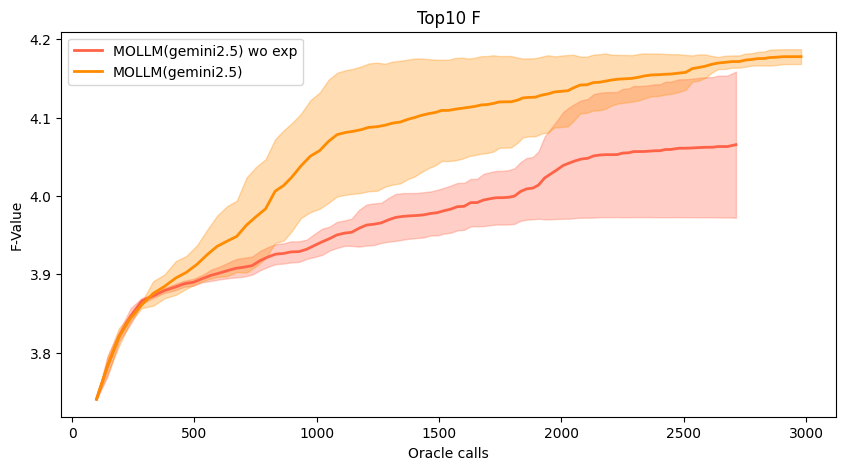

In [6]:
keyname = 'avg_top10'
plt.figure(figsize=(10, 5))


root = '/home/hp/src/mollm_results/exp/zgca,gemini-2.5-flash-preview-04-17-nothinking/results/sa_drd2_qed_gsk3b_jnk3_0609_random1_no_exp_{}.json'
plot_mean_std(root,keyname,label='MOLLM(gemini2.5) wo exp',color=colors[0],file_num=5)

root = '/home/hp/src/mollm_results/exp/zgca,gemini-2.5-flash-preview-04-17-nothinking/results/sa_drd2_qed_gsk3b_jnk3_0609_random1_nsga_so_select_{}.json'
plot_mean_std(root,keyname,label='MOLLM(gemini2.5)',color=colors[3],file_num=5)


#root = '/home/hp/src/mollm_results/coevol/zgca,gemini-2.5-flash-preview-04-17-nothinking/results/sa_drd2_qed_gsk3b_jnk3_0704_coevol_{}.json'
#plot_mean_std(root,keyname,label='MOLLM(gemini2.5) coevol',color=colors[0],file_num=1)


plt.title(f'Top10 F')
plt.xlabel('Oracle calls')
plt.ylabel('F-Value')
plt.legend()
#plt.grid(True)
plt.show()


In [41]:
names = ['qed','jnk3','drd2','gsk3b','mestranol_similarity','albuterol_similarity',
        'thiothixene_rediscovery','celecoxib_rediscovery', 'troglitazone_rediscovery',
        'perindopril_mpo','ranolazine_mpo','sitagliptin_mpo','amlodipine_mpo',
        'fexofenadine_mpo','osimertinib_mpo', 'zaleplon_mpo','median1','median2', 
        'deco_hop', 'scaffold_hop','isomers_c7h8n2o2','isomers_c9h10n2o2pf2cl',
        'valsartan_smarts' ]
scores = []
for name in names:
    path = f'/home/hp/src/mollm_results/pmo/zhongzhuan,gpt-4o-2024-05-13/results/{name}_0507_exp0.5_random1_42.json'
    with open(path,'r') as f:
        file = json.load(f)
    print(name,file['results'][-1]['top10_auc'])
    scores.append(file['results'][-1]['top10_auc'])
print('sum',np.sum(scores))

qed 0.9426521899090347
jnk3 0.8220799999999999
drd2 0.9722383186044946
gsk3b 0.8361350000000001
mestranol_similarity 0.9040998871830443
albuterol_similarity 0.9816193766053602
thiothixene_rediscovery 0.5474290047230849
celecoxib_rediscovery 0.8687195992723143
troglitazone_rediscovery 0.3413830743072949
perindopril_mpo 0.6456676785721628
ranolazine_mpo 0.8432987063569599
sitagliptin_mpo 0.58682935071416
amlodipine_mpo 0.7051840773889158
fexofenadine_mpo 0.8558163594472182
osimertinib_mpo 0.8879460554864432
zaleplon_mpo 0.5706560581983994
median1 0.3388596524728898
median2 0.3027950851019834
deco_hop 0.6223846529031811
scaffold_hop 0.14509451151776045
isomers_c7h8n2o2 0.9774975202827846
isomers_c9h10n2o2pf2cl 0.8929083485209274
valsartan_smarts 0.0
sum 15.591294507568414


In [42]:
from tdc import Oracle

for name in ['qed','sa','drd2','jnk3','gsk3b']:
    oracle = Oracle(name=name)
    print(f'{name} ,score:',oracle('N#Cc1ncn(-c2ccc(F)cc2F)n1'))

Found local copy...


qed ,score: 0.708458563549478


Found local copy...
/home/hp/miniconda3/envs/ai/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator SVC from version 0.23.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
Found local copy...


sa ,score: 2.4566023495731475
drd2 ,score: 0.00092762715103974


/home/hp/miniconda3/envs/ai/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/hp/miniconda3/envs/ai/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
Found local copy...
/home/hp/miniconda3/envs/ai/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.0 when usin

jnk3 ,score: 0.0
gsk3b ,score: 0.01


/home/hp/miniconda3/envs/ai/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [43]:
import os
import json
root = '/home/hp/src/mollm_results/pmo/zhongzhuan,gpt-4o-2024-05-13/results'
files = os.listdir(root)
for filename in files:
    with open(os.path.join(root,filename),'r') as f:
        file = json.load(f)
    print(filename,file['results'][-1]['top10_auc'])

celecoxib_rediscovery_0507_exp0.5_random1_42.json 0.8687195992723143
median1_0507_exp0.5_random1_42.json 0.3388596524728898
gsk3b_0507_exp0.5_random1_42.json 0.8361350000000001
isomers_c9h10n2o2pf2cl_0507_exp0.5_random1_42.json 0.8929083485209274
zaleplon_mpo_0507_exp0.5_random1_42.json 0.5706560581983994
jnk3_0507_exp0.5_random1_42.json 0.8220799999999999
amlodipine_mpo_0507_exp0.5_random1_42.json 0.7051840773889158
perindopril_mpo_0507_exp0.5_random1_42.json 0.6456676785721628
osimertinib_mpo_0507_exp0.5_random1_42.json 0.8879460554864432
thiothixene_rediscovery_0507_exp0.5_random1_42.json 0.5474290047230849
isomers_c7h8n2o2_0507_exp0.5_random1_42.json 0.9774975202827846
ranolazine_mpo_0507_exp0.5_random1_42.json 0.8432987063569599
deco_hop_0507_exp0.5_random1_42.json 0.6223846529031811
qed_0507_exp0.5_random1_42.json 0.9426521899090347
median2_0507_exp0.5_random1_42.json 0.3027950851019834
valsartan_smarts_0507_exp0.5_random1_42.json 0.0
fexofenadine_mpo_0507_exp0.5_random1_42.json 

In [48]:
import yaml
def save_mols_molopt():
    for j in range(2):
        seed = 42+j
        output_file_path = f"/home/hp/src/MOLLEO_fork/multi_objective/main/molleo_multi_pareto/results/results_GPT-4_['jnk3', 'qed']_['sa', 'gsk3b', 'drd2']{seed}random1.yaml"
        save_name = f'/home/hp/src/admet/molleo_{seed}.csv'
        with open(output_file_path, 'r') as f:
            mol_buffer = yaml.unsafe_load(f)
        mol_buffer
        smis = []
        scores = []
        i = 0
        for key,value in mol_buffer.items():
            smis.append(key)
            scores.append(value[0])
            i+= 1
            if i==100:
                break
        final_csv = pd.DataFrame({'smiles':smis,'scores':scores}).sort_values(by='scores',ascending=False).reset_index(drop=True)
        final_csv.to_csv(save_name,index=False)
save_mols_molopt()

In [49]:
import os
seed = 1
output_file_path = f"/home/hp/src/MOLLEO_fork/multi_objective/main/molleo_multi_pareto/results/results_GPT-4_['jnk3', 'qed']_['sa', 'gsk3b', 'drd2']{seed}.yaml"
with open(output_file_path, 'r') as f:
    mol_buffer = yaml.unsafe_load(f)
len(mol_buffer)

3668

In [50]:
from tdc.generation import MolGen
data = MolGen(name='ZINC')
moles_df = data.get_data()
zinc_smiles = moles_df.smiles.values.tolist()
len(zinc_smiles)

Found local copy...
Loading...
Done!


249455

In [244]:
import json
import os
import numpy as np
import pickle
from tqdm import tqdm
root = "/home/hp/src/mollm_results/exp/zhongzhuan,gpt-4o-2024-05-13/mols/sa_drd2_qed_gsk3b_jnk3_0527_random1_non_repeat_{}.pkl"
file_num = 3

def novelty(smiles):
    repeat = 0
    for smi in tqdm(smiles):
        if smi in zinc_smiles:
            repeat +=1
    return 1-repeat/len(smiles)
def cal_novelty(root,file_num):
    nos = []
    for i in range(file_num):

        filename = root.format(44+i)
        with open(os.path.join(root,filename),'rb') as f:
            file = pickle.load(f)
        print(file.keys())
        all_mols = [j[0] for j in file['all_mols']]
        top100 = sorted(all_mols, key=lambda p: p.total, reverse=True)[:100]
        smiles = [j.value for j in top100]
           
        print(smiles)
        nos.append(novelty(smiles))
    print('mean novelty:',np.mean(nos))
cal_novelty(root,file_num)


dict_keys(['history', 'init_pops', 'final_pops', 'all_mols', 'properties', 'evaluation', 'running_time'])
['CN(C)C(=O)c1ccc(Nc2cc(F)ccn2)cc1C(N)=O', 'NC(=O)c1cc(Nc2cc(Br)ccn2)ccc1Cl', 'CN(C)C(=O)c1ccnc(Nc2ccc(F)c(C(N)=O)c2)c1', 'CN(C)C(=O)c1ccnc(Nc2ccc(Cl)c(C(N)=O)c2)c1', 'NC(=O)c1cc(Nc2cc(Cl)ccn2)ccc1Cl', 'NC(=O)c1cc(Nc2cc(F)ccn2)ccc1Cl', 'CN(C)C(=O)c1ccc(Nc2cc(Cl)ccn2)cc1C(N)=O', 'NC(=O)c1ccc(Nc2cc(F)ccn2)cc1Cl', 'COc1ccc(Nc2cc(F)c(C(N)=O)cn2)cc1Cl', 'COc1ccc(Nc2cc(Cl)ccn2)cc1C(N)=O', 'COc1ccc(Nc2cc(Cl)c(C(N)=O)cn2)cc1', 'COc1ccc(Nc2cc(Cl)c(C(N)=O)cn2)cc1F', 'CNC(=O)c1cccc(Nc2cc(Br)ccn2)c1', 'COc1ccc(Nc2cc(F)ccn2)cc1C(N)=O', 'COc1ccc(Nc2cc(Cl)c(F)cn2)cc1C(N)=O', 'NC(=O)c1cc(Nc2cc(F)ccn2)ccc1F', 'CNC(=O)c1cc(Nc2cc(F)ccn2)ccc1OC', 'CNC(=O)c1cc(Nc2cc(F)c(OC)cn2)ccc1OC', 'COc1ccc(Nc2cc(Cl)c(C(N)=O)cn2)cc1OC', 'COc1ccc(Nc2cc(C(N)=O)c(Cl)cn2)cc1', 'CN(C)C(=O)c1cc(Nc2cc(Br)ccn2)ccc1C(N)=O', 'COc1ccc(Nc2cc(C(N)=O)c(F)cn2)cc1Cl', 'COc1ccc(Nc2cc(Cl)c(C(N)=O)cn2)cc1Cl', 'CNC(=O)c1cc(Nc2cc(Cl)cc

100%|██████████| 100/100 [00:00<00:00, 675.08it/s]


dict_keys(['history', 'init_pops', 'final_pops', 'all_mols', 'properties', 'evaluation', 'running_time'])
['COc1ccccc1NC(=O)Cc1cccc2ccccc12', 'COc1ccccc1NC(=O)Cc1cccc2cnccc12', 'Cc1ccccc1NC(=O)Cc1cccc2cnccc12', 'COc1cccc(NC(=O)Cc2cccc3ccccc23)c1OC', 'Cc1ccccc1NC(=O)Cc1cccc2ccccc12', 'COc1ccc(Cl)cc1NC(=O)Cc1cccc2cnccc12', 'COc1ccc(C)cc1NC(=O)Cc1cccc2cnccc12', 'COc1cc(C)ccc1NC(=O)Cc1cccc2cnccc12', 'COc1ccc(C#N)c(NC(=O)Cc2cccc3ccccc23)c1', 'COc1cccc(NC(=O)Cc2cccc3ccccc23)c1CO', 'COc1ccc(NC(=O)Cc2cccc3ccccc23)c(C#N)c1', 'COc1cccc(NC(=O)Cc2cccc3cnccc23)c1Cl', 'COc1ccc(O)cc1NC(=O)Cc1cccc2ccccc12', 'Cc1ccc(S(C)(=O)=O)cc1NC(=O)Cc1cccc2ccccc12', 'Cc1cccc(NC(=O)Cc2cccc3ccccc23)c1S(C)(=O)=O', 'COc1cccc(NC(=O)Cc2cccc3ccccc23)c1S(C)(=O)=O', 'COc1cc(C)c(NC(=O)Cc2cccc3cnccc23)cc1Cl', 'CS(=O)(=O)c1ccccc1NC(=O)Cc1cccc2cnccc12', 'COc1ccc(C#N)c(NC(=O)Cc2cccc3cnccc23)c1', 'Cc1ccc(S(C)(=O)=O)c(NC(=O)Cc2cccc3ccccc23)c1', 'Cc1cccc(NC(=O)Cc2cccc3cnccc23)c1S(C)(=O)=O', 'Cc1cc(Br)ccc1NC(=O)Cc1cccc2cnccc12', 'CO

100%|██████████| 100/100 [00:00<00:00, 648.80it/s]


dict_keys(['history', 'init_pops', 'final_pops', 'all_mols', 'properties', 'evaluation', 'running_time'])
['COc1cc(Nc2ccccc2C(N)=O)ccc1F', 'COc1ccc(Nc2ccccc2F)cc1C(N)=O', 'COc1ccc(Nc2ccc(Cl)cc2C(F)(F)F)cc1C(N)=O', 'NC(=O)c1ccc(Nc2ccccc2F)cc1Br', 'NC(=O)c1ccccc1Nc1cc(Cl)ccc1C(F)(F)F', 'NC(=O)c1ccc(Nc2ccccc2F)cc1Cl', 'NC(=O)c1ccccc1Nc1ccc(Cl)c(F)c1', 'COc1ccc(Nc2ccccc2C(N)=O)cc1Cl', 'NC(=O)c1ccccc1Nc1ccc(Cl)cc1', 'NC(=O)c1cc(Nc2ccccc2F)ccc1Cl', 'COc1ccc(Nc2ccccc2Cl)cc1C(N)=O', 'NC(=O)c1ccccc1Nc1ccc(C(F)(F)F)c(Cl)c1', 'NC(=O)c1ccc(Nc2ccccc2F)cc1F', 'NC(=O)c1cc(Nc2ccccc2C(F)(F)F)ccc1Cl', 'NC(=O)c1ccc(Nc2ccccc2C(F)(F)F)cc1Cl', 'N#Cc1cc(Nc2ccccc2C(N)=O)ccc1Cl', 'NC(=O)c1ccccc1Nc1ccc(F)cc1', 'NC(=O)c1cc(Nc2ccccc2Cl)ccc1C(F)(F)F', 'NC(=O)c1cc(Nc2ccccc2Br)ccc1Cl', 'NC(=O)c1cc(Nc2ccccc2F)ccc1F', 'COc1ccc(Nc2ccccc2F)c(C(N)=O)c1', 'COc1ccc(Nc2ccc(Cl)cc2F)cc1C(N)=O', 'N#Cc1ccc(Nc2ccccc2F)cc1C(N)=O', 'N#Cc1cc(Nc2ccccc2F)ccc1C(N)=O', 'NC(=O)c1cc(Nc2ccccc2Cl)ccc1F', 'NC(=O)c1cc(Nc2ccccc2F)ccc1Br', 'N#

100%|██████████| 100/100 [00:00<00:00, 737.12it/s]

mean novelty: 1.0


### mean property values

In [ ]:
import tdc
properties = ['sa','drd2','gsk3b','qed','jnk3']
score_functions = [tdc.Oracle(name=name) for name in properties]

Found local copy...
Found local copy...
Found local copy...
/home/hp/miniconda3/envs/ai/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/hp/miniconda3/envs/ai/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


3.0699830653570395
0.00018312657267238256
0.03
0.8521001018812191
0.0


In [131]:
import os
output_file_path = "/home/hp/src/MOLLEO_fork/multi_objective/main/molleo_multi_pareto/results/results_GPT-4_['jnk3', 'qed']_['sa', 'gsk3b', 'drd2']{}random1.yaml"
smis = []
raw_scores = []
for j in range(1):
    path = output_file_path.format(43+j)
    with open(path, 'r') as f:
        mol_buffer = yaml.unsafe_load(f)
    for i,key in enumerate(mol_buffer.keys()):
        print(mol_buffer[key][0])
        smis.append(key)
        score = []
        for s in score_functions:
            score.append(s(key))
        raw_scores.append(score)
        if i == 99:
            break
raw_scores = np.array(raw_scores)
raw_scores.shape,raw_scores.mean(axis = 0)

4.194693042000529
4.194693042000529
4.1221878331506
4.11947229614209
3.991812449289494
3.991812449289494
3.9865674744855832
3.9865674744855832
3.9813400045760714
3.9813400045760714
3.9490043084903803
3.9490043084903803
3.9473662726944725
3.9473662726944725
3.947327399029839
3.947327399029839
3.944716103979369
3.943031388176056
3.943031388176056
3.9417022606350423
3.9417022606350423
3.9408575386200537
3.940815126043512
3.940815126043512
3.9395759758933435
3.9395759758933435
3.939574753810786
3.939574753810786
3.9388576748212576
3.938564618460509
3.938564618460509
3.934974749005876
3.934974749005876
3.9345325377155342
3.9345325377155342
3.933920001729291
3.9338030815894625
3.9322281202761618
3.9322281202761618
3.9320979950549564
3.9320979950549564
3.9318537464040313
3.9318537464040313
3.931781500009885
3.931781500009885
3.931773410621576
3.931773410621576
3.9317355275186205
3.931577648726261
3.931577648726261
3.9303728854660402
3.9303728854660402
3.928753290167573
3.928753290167573
3.928

((100, 5),
 array([1.86077370e+00, 8.54261412e-04, 1.34000000e-02, 9.18579336e-01,
        1.33100000e-01]))

In [126]:
raw_scores.mean(axis = 0)

array([1.87820760e+00, 1.10955980e-03, 1.22400000e-02, 8.95531099e-01,
       2.35420000e-01])

In [122]:
def read_scores(root):
    init_scores = []
    scores = []
    totals = []
    for i in range(4):
        path = root.format(43+i)
        with open(path,'rb') as f:
            file = pickle.load(f)
        print(file['properties'])
        mols = [p[0] for p in file['all_mols']]
        mols = sorted(mols, key=lambda item: item.total, reverse=True)[:100]
        for p in mols:
            scores.append(p.raw_scores)
            totals.append(p.total)
    for i in file['init_pops']:
        init_scores.append(i.raw_scores)
    return np.array(scores),np.array(init_scores)
path = '/home/hp/src/mollm_results/exp/zhongzhuan,gpt-4o-2024-05-13/mols/sa_drd2_qed_gsk3b_jnk3_0507_exp0.5_{}.pkl'
final_scores,init_scores = read_scores(path)
np.mean(final_scores,axis=0),np.mean(init_scores,axis=0)

['sa', 'drd2', 'qed', 'gsk3b', 'jnk3']
['sa', 'drd2', 'qed', 'gsk3b', 'jnk3']
['sa', 'drd2', 'qed', 'gsk3b', 'jnk3']
['sa', 'drd2', 'qed', 'gsk3b', 'jnk3']


(array([1.98952931e+00, 1.14787364e-03, 8.27836442e-01, 6.84500000e-02,
        6.45600000e-01]),
 array([3.02145175, 0.00866239, 0.73042698, 0.0263    , 0.015     ]))

In [116]:
path = '/home/hp/src/mollm_results/exp/zhongzhuan,gpt-4o-2024-05-13/mols/sa_drd2_qed_gsk3b_jnk3_0507_exp0.5_{}.pkl'
top100 = []
for i in range(5):
    new_path = path.format(42+i)
    with open(new_path,'rb') as f:
        file = pickle.load(f)
    file.keys()
    print(file['evaluation'][-1])
    top100.append(file['evaluation'][-1]['avg_top100'])
np.mean(top100)

{'all_unique_moles': 4999, 'llm_calls': 2956, 'Uniqueness': 0.9141891892036843, 'Validity': 0.9133445946092323, 'avg_top1': 4.205417728616168, 'avg_top10': 4.19297755993123, 'avg_top100': 4.136325547737391, 'top1_auc': 4.071591843485419, 'top10_auc': 4.0260973582797845, 'top100_auc': 3.9457257071666434, 'hypervolume': 0.9167041125795712, 'div': 0.5065259789363821, 'generated_num': 5920}
{'all_unique_moles': 4999, 'llm_calls': 3189, 'Uniqueness': 0.8467324870950114, 'Validity': 0.9210155148219691, 'avg_top1': 4.275178619230402, 'avg_top10': 4.263413852272373, 'avg_top100': 4.175312803322001, 'top1_auc': 4.038853330752092, 'top10_auc': 3.9969197612916783, 'top100_auc': 3.92022582591177, 'hypervolume': 0.7653261793943613, 'div': 0.48363673287428804, 'generated_num': 6381}
{'all_unique_moles': 4999, 'llm_calls': 3111, 'Uniqueness': 0.8744581795032175, 'Validity': 0.9120244020048123, 'avg_top1': 4.201602881077445, 'avg_top10': 4.178595293181132, 'avg_top100': 4.147566611280366, 'top1_auc': 

4.262377803026081

['sa', 'drd2', 'qed', 'gsk3b', 'jnk3']
['NC(=O)c1ccc(NC2=NC=CC(N(C)C)=C2)cc1Cl', 'NC(=O)c1ccc(cc1OC)NC2=NC=CC(Cl)=C2']
['sa', 'drd2', 'qed', 'gsk3b', 'jnk3']
['NC(=O)c1ccc(NC2=NC=CC(N(C)C)=C2)cc1Cl', 'NC(=O)c1ccc(cc1OC)NC2=NC=CC(Cl)=C2', 'O=C(Cc1cccc2ccccc12)Nc3ccccc3OC', 'O=C(Cc1cccc2ccccc12)Nc3ccccc3C(=O)N(C)C']
['sa', 'drd2', 'qed', 'gsk3b', 'jnk3']
['NC(=O)c1ccc(NC2=NC=CC(N(C)C)=C2)cc1Cl', 'NC(=O)c1ccc(cc1OC)NC2=NC=CC(Cl)=C2', 'O=C(Cc1cccc2ccccc12)Nc3ccccc3OC', 'O=C(Cc1cccc2ccccc12)Nc3ccccc3C(=O)N(C)C', 'NC(=O)c1ccc(Nc2nccc(Cl)c2)cc1OC', 'NC(=O)c1ccc(Nc2nccc(Cl)c2)cc1Cl']
['sa', 'drd2', 'qed', 'gsk3b', 'jnk3']
['NC(=O)c1ccc(NC2=NC=CC(N(C)C)=C2)cc1Cl', 'NC(=O)c1ccc(cc1OC)NC2=NC=CC(Cl)=C2', 'O=C(Cc1cccc2ccccc12)Nc3ccccc3OC', 'O=C(Cc1cccc2ccccc12)Nc3ccccc3C(=O)N(C)C', 'NC(=O)c1ccc(Nc2nccc(Cl)c2)cc1OC', 'NC(=O)c1ccc(Nc2nccc(Cl)c2)cc1Cl', 'O=C(Cc1cccc2ccccc12)Nc1ccccc1C(=O)OC', 'O=C(Cc1cccc2ccccc12)Nc1ccncc1C(=O)OC']
['sa', 'drd2', 'qed', 'gsk3b', 'jnk3']
['NC(=O)c1ccc(NC2=NC=CC(N(C)C)=

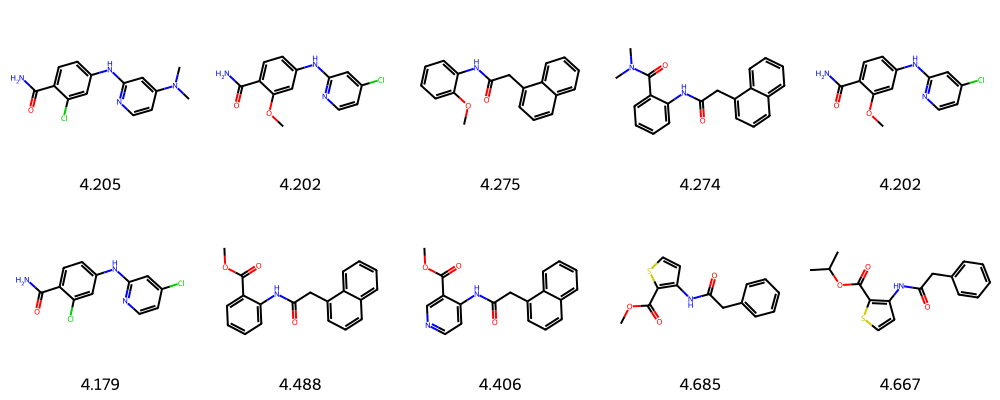

In [174]:
from rdkit import Chem
from rdkit.Chem import Draw


def read_mols(root):
    smis = []
    scores = []
    num_per_file = 2
    for i in range(5):
        path = root.format(42+i)
        with open(path,'rb') as f:
            file = pickle.load(f)
        print(file['properties'])
        mols = [p[0] for p in file['all_mols']]
        mols = sorted(mols, key=lambda item: item.total, reverse=True)
        tmp_smis = []
        pre_score = 0
        for m in mols:
            if len(tmp_smis) == num_per_file:
                break
            if m.total!=pre_score:
                tmp_smis.append(m.value)
                scores.append(m.total)
                pre_score = m.total
        smis.extend(tmp_smis)
        print(smis)
    return smis,scores
path = '/home/hp/src/mollm_results/exp/zhongzhuan,gpt-4o-2024-05-13/mols/sa_drd2_qed_gsk3b_jnk3_0507_exp0.5_{}.pkl'
smiles_list, f_values = read_mols(path)
print(f'mean scores {np.mean(f_values)}')

def plot_mols(smiles_list,f_values):
    mols = [Chem.MolFromSmiles(smi) for smi in smiles_list]

    # Create legends with F values
    legends = [f"{f_values[i]:.3f}" for i in range(len(mols))]

    # Draw molecules in a grid with legends
    img = Draw.MolsToGridImage(
        mols,
        molsPerRow=5,
        subImgSize=(200, 200),
        legends=legends
    )
    return img
img = plot_mols(smiles_list,f_values)
img

[4.122848317680034, 4469]
[3.9742893741492944, 4333]
[4.300224890645433, 4800]
[4.280054044481174, 4441]
[4.584552932109015, 2827]
[4.579819939729197, 3275]
[4.064827401726978, 4898]
[4.038556856027412, 4450]
[4.078366332062088, 4580]
[3.99808272349886, 4624]


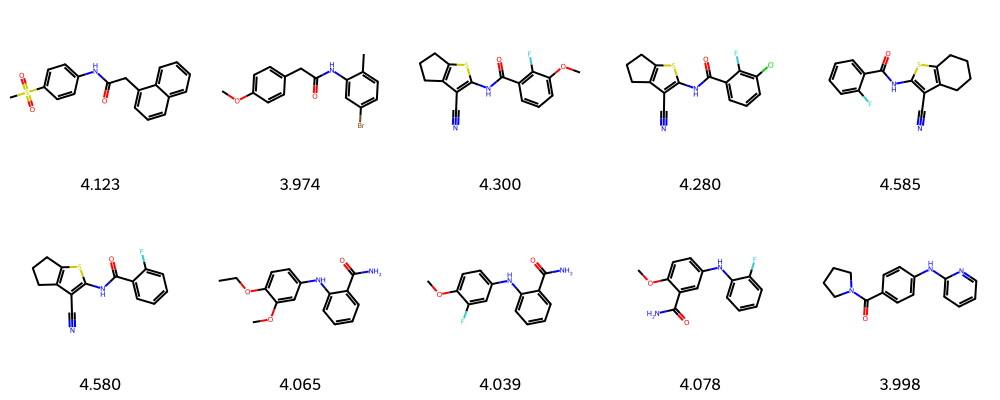

In [180]:
import os
root = "/home/hp/src/mol_opt/main/reinvent/results/results_reinvent_qed:1+jnk3:1+drd2:1+gsk3b:1+sa:1_{}_random1_.yaml"

def read_mols_opt(root):
    smis = []
    scores = []
    mols_per_file = 2
    for j in range(5):
        path = root.format(42+j)
        with open(path, 'r') as f:
            mol_buffer = yaml.unsafe_load(f)
        tmp_smis = []
        pre_score = 0
        for i,key in enumerate(mol_buffer.keys()):
            print(mol_buffer[key])
            if mol_buffer[key][0] != pre_score:
                tmp_smis.append(key)
                scores.append(mol_buffer[key][0])
                pre_score = mol_buffer[key][0]
            if len(tmp_smis) == mols_per_file:
                break
        smis.extend(tmp_smis)
    return smis,scores
smis,scores = read_mols_opt(root)
plot_mols(smis,scores)


In [194]:
def read_mols(root,seed ):
    smis = []
    scores = []
    num_per_file = 100
    for i in range(1):
        path = root.format(seed+i)
        with open(path,'rb') as f:
            file = pickle.load(f)
        print(file['properties'])
        mols = [p[0] for p in file['all_mols']]
        mols = sorted(mols, key=lambda item: item.total, reverse=True)
        tmp_smis = []
        pre_score = 0
        for m in mols:
            if len(tmp_smis) == num_per_file:
                break
            if m.total!=pre_score:
                tmp_smis.append(m.value)
                scores.append(m.total)
                pre_score = m.total
        smis.extend(tmp_smis)
    return smis,scores
seed = 46
path = '/home/hp/src/mollm_results/exp/zhongzhuan,gpt-4o-2024-05-13/mols/sa_drd2_qed_gsk3b_jnk3_0507_exp0.5_{}.pkl'
smis,scores = read_mols(path,seed)
save_name =  f'/home/hp/src/admet/gpt_4o_{seed}.csv'
final_csv = pd.DataFrame({'smiles':smis,'scores':scores})
final_csv.to_csv(save_name,index=False)

['sa', 'drd2', 'qed', 'gsk3b', 'jnk3']


In [223]:
path = '/home/hp/src/mollm_results/exp/zhongzhuan,gpt-4o-2024-05-13/mols/sa_drd2_qed_gsk3b_jnk3_0527_random1_non_repeat_44.pkl'
with open(path,'rb') as f:
    file = pickle.load(f)
print(file['properties'])
mols = [p[0] for p in file['all_mols']]
mols = sorted(mols, key=lambda item: item.total, reverse=True)

['sa', 'drd2', 'qed', 'gsk3b', 'jnk3']


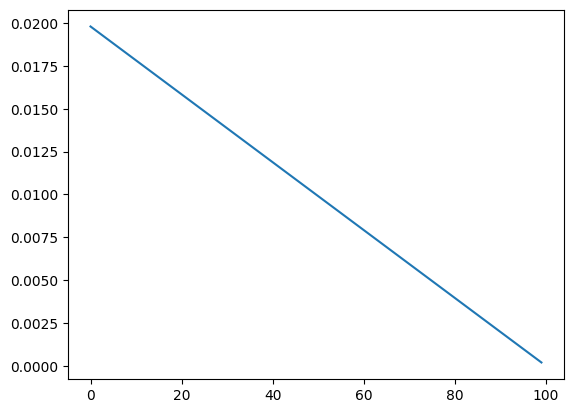

In [236]:
n = 100
weights = np.array([n - i for i in range(n)], dtype=np.float64)
prob = weights / weights.sum()
prob
plt.plot(prob)
plt.show()

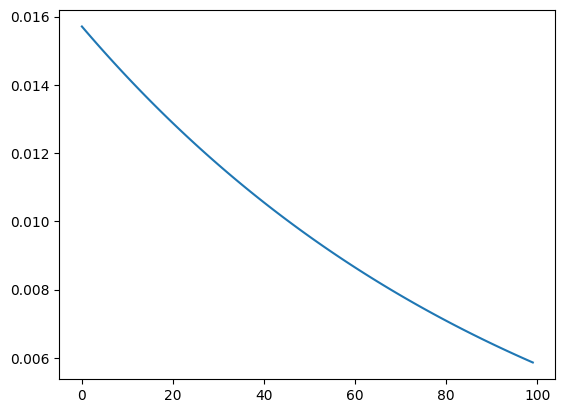

In [241]:
base = 1.01
n = 100

# 权重是 base 的幂：base^(n-rank)
weights = np.array([base**(n - i - 1) for i in range(n)], dtype=np.float64)
prob = weights / weights.sum()
plt.plot(prob)
plt.show()

In [79]:
import json
prompt_dict = {}
prompt_dict['description'] = "This task is to propose better molecules " \
"according to the multiple objectives."

prompt_dict['example_output'] = "Each output new candidate must start with <candidate> and end with </candidate> in SMILES format." \
"Example one output: <candidate>c1ccccc1</candidate>"

prompt_dict['mutation_instruction'] = ("Example operations include:\n"
                "1. Modify functional groups\n"
                "2. Replace atoms or bonds\n"
                "3. Add/remove small substituents\n"
                "4. Ring modifications\n"
                "5. Stereochemistry changes\n"
                "6. Property-specific optimizations\n")
prompt_dict['crossover_instruction'] = ""
prompt_dict['other_requirements'] = "The output molecules should be valid."
file_path = "/home/hp/src/MOLLM/problem/molecule.json"
with open(file_path, "w") as json_file:
    json.dump(prompt_dict, json_file, indent=4)

In [81]:
with open(file_path, "r") as json_file:
    a = json.load(json_file)
a

{'description': 'This task is to propose better molecules according to the multiple objectives.',
 'example_output': 'Each output new candidate must start with <candidate> and end with </candidate> in SMILES format. Example one output: <candidate>c1ccccc1</candidate>',
 'mutation_instruction': 'Example operations include:\n1. Modify functional groups\n2. Replace atoms or bonds\n3. Add/remove small substituents\n4. Ring modifications\n5. Stereochemistry changes\n6. Property-specific optimizations\n',
 'crossover_instruction': '',
 'other_requirements': 'The output molecules should be valid.',
 'qed': "QED (Quantitative Estimate of Drug-likeness) is a measure that quantifieshow 'drug-like' a molecule is based on properties such as molecular weight,solubility, and the number of hydrogen bond donors and acceptors.Adding functional groups that improve drug-like properties (e.g., small molecular size,balanced hydrophilicity) can increase QED, while introducing large, complex, or highly polar

In [83]:
import yaml
yaml_file_path = "/home/hp/src/MOLLM/problem/molecule.yaml"
with open(yaml_file_path, "w") as yaml_file:
    yaml.dump(a, yaml_file, allow_unicode=True, sort_keys=False)
yaml_file_path

'/home/hp/src/MOLLM/problem/molecule.yaml'

In [97]:
import os

def get_file_sizes(folder_path):
    file_sizes = []

    for root, dirs, files in os.walk(folder_path):
        for filename in files:
            filepath = os.path.join(root, filename)
            try:
                size = os.path.getsize(filepath)
                file_sizes.append((filepath, size))
            except OSError:
                pass  # 忽略无法访问的文件

    # 按照大小从大到小排序
    file_sizes.sort(key=lambda x: x[1], reverse=True)

    return file_sizes

# 使用方法：替换为你自己的路径
folder = "/home/hp/src/MOLLM/genetic_gfn"  # 替换成你要分析的文件夹路径
results = get_file_sizes(folder)

# 输出前 20 个最大文件（可以改数量）
for filepath, size in results[:20]:
    print(f"{filepath} - {size / 1024 / 1024:.2f} MB")


/home/hp/src/MOLLM/genetic_gfn/multi_objective/data/docked_mols.h5 - 93.17 MB
/home/hp/src/MOLLM/genetic_gfn/multi_objective/oracle/drd2_current.pkl - 33.78 MB
/home/hp/src/MOLLM/genetic_gfn/multi_objective/oracle/gsk3b_current.pkl - 26.50 MB
/home/hp/src/MOLLM/genetic_gfn/multi_objective/genetic_gfn/data/Prior.ckpt - 15.92 MB
/home/hp/src/MOLLM/genetic_gfn/multi_objective/genetic_gfn/data/mols_filtered.smi - 10.74 MB
/home/hp/src/MOLLM/genetic_gfn/multi_objective/oracle/jnk3_current.pkl - 10.38 MB
/home/hp/src/MOLLM/genetic_gfn/multi_objective/oracle/fpscores.pkl - 8.63 MB
/home/hp/src/MOLLM/genetic_gfn/multi_objective/data/pretrained_proxy/info.pkl - 2.86 MB
/home/hp/src/MOLLM/genetic_gfn/multi_objective/data/pretrained_proxy/best_params.pkl - 2.67 MB
/home/hp/src/MOLLM/genetic_gfn/multi_objective/data/pretrained_proxy/params.pkl - 2.67 MB
/home/hp/src/MOLLM/genetic_gfn/multi_objective/genetic_gfn/results/results_2_genetic_gfn_5_44.yaml - 1.67 MB
/home/hp/src/MOLLM/genetic_gfn/multi_